In [1]:
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.optim as optim
import torchvision.models as models
from dataset import ChestXrayDataset
from train import train
from evaluation import plot_results ,eval_on_metrics

In [2]:
IMAGE_PATH = "../archive/"
import glob

# Tüm alt klasörlerdeki jpg ve png dosyalarını alalım
image_paths = glob.glob(IMAGE_PATH + "**/images/*.[jp][pn]g", recursive=True)

print(f"Toplam {len(image_paths)} resim bulundu.")

Toplam 112120 resim bulundu.


In [3]:
TRAIN_PATH = 'data/AP_PA_Train.xlsx'
TEST_PATH = 'data/AP_PA_Test.xlsx'
VAL_PATH = 'data/AP_PA_Validation.xlsx'

In [4]:
num_classes = 2
EPOCHS = 5

In [5]:
model = models.resnet34(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

in_features = model.fc.in_features
model.fc = nn.Linear(in_features, num_classes)

for param in model.fc.parameters():
    param.requires_grad = True

c:\Users\Furkan-PC\192.168.0.14+8000\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Furkan-PC\192.168.0.14+8000\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
print(device)

cuda


In [7]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


In [8]:
train_dataset = ChestXrayDataset(TRAIN_PATH, image_paths,transform=transform)
val_dataset = ChestXrayDataset(TEST_PATH,image_paths, transform=transform)
test_dataset = ChestXrayDataset(VAL_PATH,image_paths, transform=transform)

In [9]:
print("Train size : ",len(train_dataset))
print("Validation size : ",len(val_dataset))
print("Test size : ",len(test_dataset))

Train size :  78566
Validation size :  16491
Test size :  17063


In [10]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True,num_workers=10)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=True,num_workers=10)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True,num_workers=10)

In [11]:
train_losses, train_accuracies, val_losses, val_accuracies = train(model, train_dataloader, val_dataloader, criterion, optimizer, device,EPOCHS)

Epoch 1/5 - Validation: 100%|██████████| 258/258 [01:06<00:00,  3.85it/s]


Epoch [1/5]
  Train Loss: 0.0920, Train Acc: 0.9723
  Val   Loss: 0.0743, Val   Acc: 0.9765
  Best model saved with val_loss: 0.0743


Epoch 2/5 - Validation: 100%|██████████| 258/258 [01:04<00:00,  4.03it/s]


Epoch [2/5]
  Train Loss: 0.0593, Train Acc: 0.9825
  Val   Loss: 0.0515, Val   Acc: 0.9850
  Best model saved with val_loss: 0.0515


Epoch 3/5 - Validation: 100%|██████████| 258/258 [01:03<00:00,  4.07it/s]


Epoch [3/5]
  Train Loss: 0.0553, Train Acc: 0.9839
  Val   Loss: 0.0488, Val   Acc: 0.9859
  Best model saved with val_loss: 0.0488


Epoch 4/5 - Validation: 100%|██████████| 258/258 [01:03<00:00,  4.09it/s]


Epoch [4/5]
  Train Loss: 0.0531, Train Acc: 0.9849
  Val   Loss: 0.0478, Val   Acc: 0.9873
  Best model saved with val_loss: 0.0478


Epoch 5/5 - Validation: 100%|██████████| 258/258 [01:03<00:00,  4.07it/s]

Epoch [5/5]
  Train Loss: 0.0529, Train Acc: 0.9845
  Val   Loss: 0.0497, Val   Acc: 0.9868


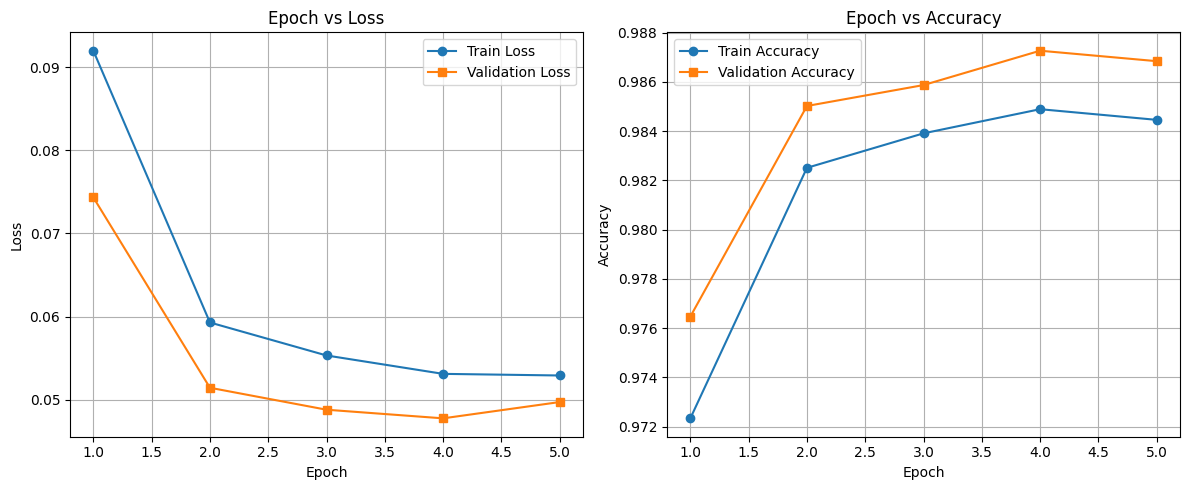

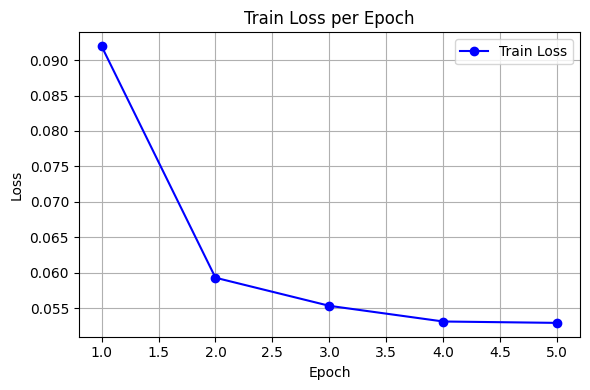

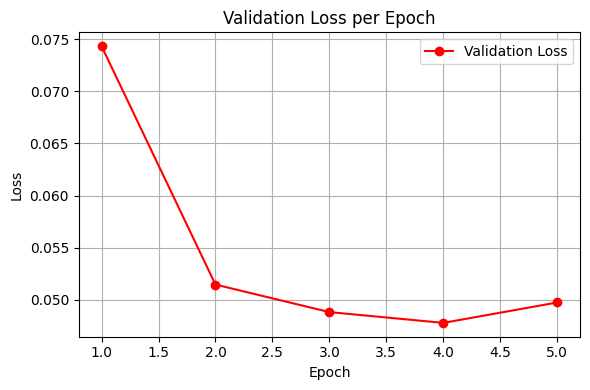

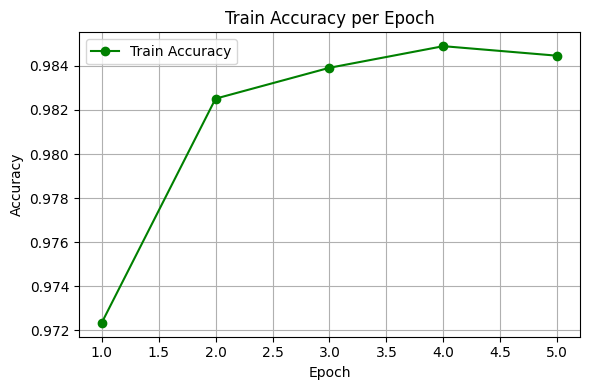

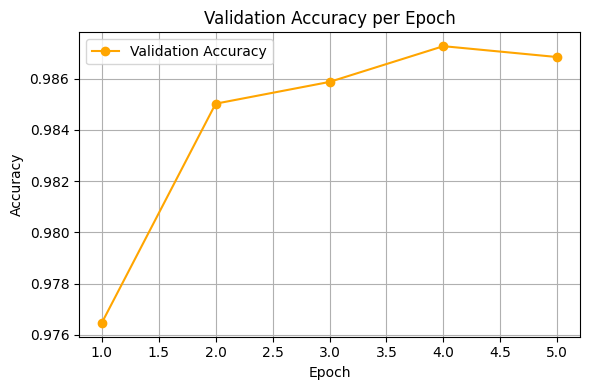

In [12]:
plot_results(EPOCHS, train_losses, train_accuracies, val_losses, val_accuracies)

Evaluating: 100%|██████████| 267/267 [01:03<00:00,  4.21it/s]

Precision: 0.9832
Recall:    0.9951
F1 Score:  0.9891
AUC:       0.9973


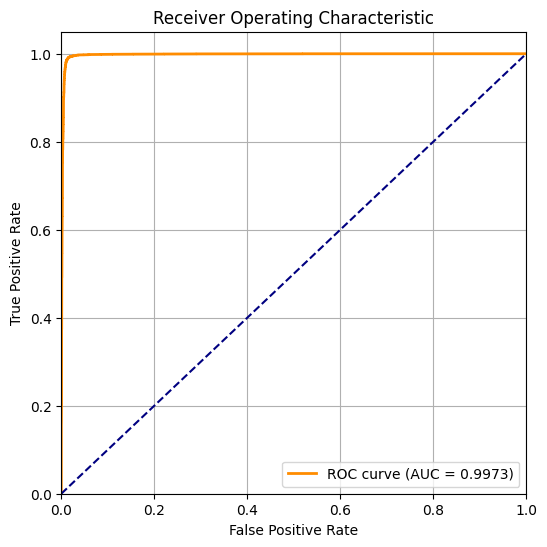

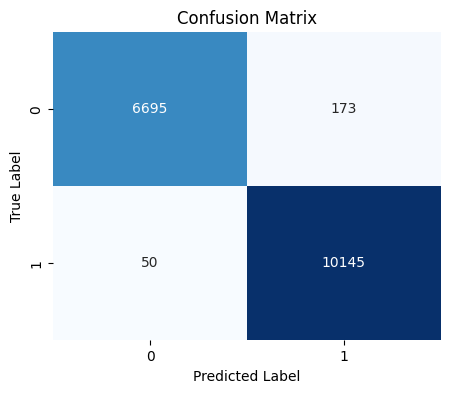

In [13]:
eval_on_metrics(model, test_dataloader)